LOADING DATASET

In [2]:
import pandas as pd

df = pd.read_csv("custom_stock_data.csv", index_col="Date", parse_dates=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-01,118.73,153.89,98.07,117.05,224123.0
2023-01-02,147.54,152.71,98.96,105.67,405628.0
2023-01-03,NaN,158.29,93.18,146.23,182989.0
2023-01-04,129.93,153.57,91.10,143.87,398356.0
2023-01-05,107.80,152.81,92.28,112.90,405669.0


In [12]:


# Change display settings
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don’t wrap lines
pd.set_option('display.max_colwidth', None) # Show full content in cells

# Now print your dataset
print(df)

# Optional: reset settings if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


              Open    High    Low   Close    Volume
Date                                               
2023-01-01  118.73  153.89  98.07  117.05  224123.0
2023-01-02  147.54  152.71  98.96  105.67  405628.0
2023-01-03     NaN  158.29  93.18  146.23  182989.0
2023-01-04  129.93  153.57  91.10  143.87  398356.0
2023-01-05  107.80  152.81  92.28  112.90  405669.0
2023-01-06  107.80  155.43  94.27     NaN  278274.0
2023-01-07  102.90  151.41  98.18     NaN  263707.0
2023-01-08  143.31  158.02  98.61  127.76  425352.0
2023-01-09  130.06  150.75  90.07     NaN  395972.0
2023-01-10  135.40  159.87  95.11  112.09  365564.0
2023-01-11  101.03  157.72  94.17  104.66  458896.0
2023-01-12  148.50  151.99  92.22  144.86  231373.0
2023-01-13  141.62  150.06  91.20  145.02  215294.0
2023-01-14  110.62  158.15  93.38  131.66  224019.0
2023-01-15  109.09  157.07  99.43  116.95  165726.0
2023-01-16  109.17  157.29  93.23  117.46  241564.0
2023-01-17  115.21  157.71  95.19  136.30  477812.0
2023-01-18  

In [ ]:
print(len(df)) #no of rows
print(len(df.columns)) #no of columns

df.shape #no. of rows and columns


60
5


(60, 5)

**learniing : when we write df. something we dont need to print it but in other cases to view the result we need to use the print() optioin

PLAYING WITH INDEX

In [11]:
df.loc["2023-01-02"]  # gives the row for Jan 2nd

Open         147.54
High         152.71
Low           98.96
Close        105.67
Volume    405628.00
Name: 2023-01-02 00:00:00, dtype: float64

PRINTING THE TOTAL NO. OF NULL VALUES IN EACH 'COLUMN'

In [3]:
print(df.isnull().sum())

Open      5
High      0
Low       0
Close     5
Volume    5
dtype: int64


MISSING DATA CHECKING AND GRAPHING

In [15]:
# Show True/False where data is missing in first 10 rows
df.head(10).isnull()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-01,False,False,False,False,False
2023-01-02,False,False,False,False,False
2023-01-03,True,False,False,False,False
2023-01-04,False,False,False,False,False
2023-01-05,False,False,False,False,False
2023-01-06,False,False,False,True,False
2023-01-07,False,False,False,True,False
2023-01-08,False,False,False,False,False
2023-01-09,False,False,False,True,False


In [16]:
# Show only rows with missing data from the first 10
df.head(10)[df.head(10).isnull().any(axis=1)]

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03,NaN,158.29,93.18,146.23,182989.0
2023-01-06,107.80,155.43,94.27,NaN,278274.0
2023-01-07,102.90,151.41,98.18,NaN,263707.0
2023-01-09,130.06,150.75,90.07,NaN,395972.0


In [24]:
# Highlight missing data in yellow
df.head(10).style.highlight_null()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-01 00:00:00,118.730000,153.890000,98.070000,117.050000,224123.000000
2023-01-02 00:00:00,147.540000,152.710000,98.960000,105.670000,405628.000000
2023-01-03 00:00:00,nan,158.290000,93.180000,146.230000,182989.000000
2023-01-04 00:00:00,129.930000,153.570000,91.100000,143.870000,398356.000000
2023-01-05 00:00:00,107.800000,152.810000,92.280000,112.900000,405669.000000
2023-01-06 00:00:00,107.800000,155.430000,94.270000,nan,278274.000000
2023-01-07 00:00:00,102.900000,151.410000,98.180000,nan,263707.000000
2023-01-08 00:00:00,143.310000,158.020000,98.610000,127.760000,425352.000000
2023-01-09 00:00:00,130.060000,150.750000,90.070000,nan,395972.000000


customising the missing values for fun

In [30]:
def highlight_missing(val):
    color = 'background-color: yellow' if pd.isnull(val) else 'background-color: blue'
    return color

df.head(10).style.map(highlight_missing)


,Open,High,Low,Close,Volume
Date,,,,,
2023-01-01 00:00:00,118.730000,153.890000,98.070000,117.050000,224123.000000
2023-01-02 00:00:00,147.540000,152.710000,98.960000,105.670000,405628.000000
2023-01-03 00:00:00,nan,158.290000,93.180000,146.230000,182989.000000
2023-01-04 00:00:00,129.930000,153.570000,91.100000,143.870000,398356.000000
2023-01-05 00:00:00,107.800000,152.810000,92.280000,112.900000,405669.000000
2023-01-06 00:00:00,107.800000,155.430000,94.270000,nan,278274.000000
2023-01-07 00:00:00,102.900000,151.410000,98.180000,nan,263707.000000
2023-01-08 00:00:00,143.310000,158.020000,98.610000,127.760000,425352.000000
2023-01-09 00:00:00,130.060000,150.750000,90.070000,nan,395972.000000


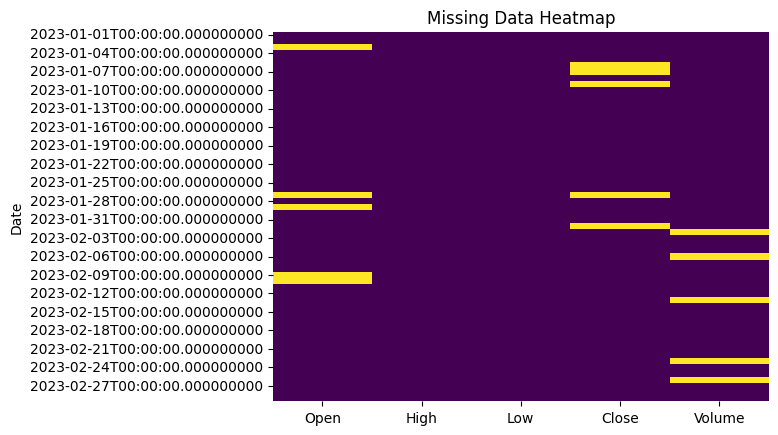

In [4]:
import seaborn as sns
import matplotlib.pyplot as ms

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
ms.title("Missing Data Heatmap")
ms.show()

SAME AS ABOVE JUST CUSTOMISING

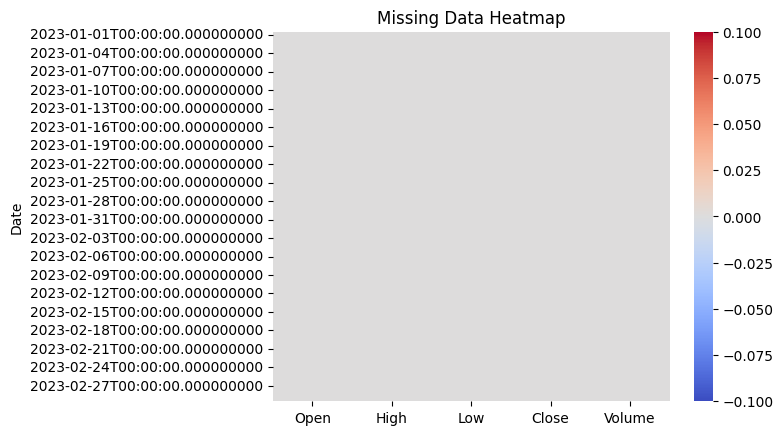

In [39]:
sns.heatmap(df.isnull(), cbar=True, cmap="coolwarm")
df = pd.read_csv('custom_stock_data.csv')
ms.title("Missing Data Heatmap")
ms.show()

the above was just experimenting with seaborn features where the cbar shows which color means what .

FILLING MISSING DATA

In [40]:
df.fillna(method='ffill', inplace=True)

/var/folders/2j/nf4vb3vj3ks8cw0341g1htnc0000gn/T/ipykernel_84615/3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


because after running this code , i filled the null datas in the dataset i have permanently changed the dataset and then i ran the above graph again and it became clear because now ther is no null data , to prevent this in future : df_original = df.copy()  # Save a backup
df.fillna(method='ffill', inplace=True)
then in the graph use df = df_original.copy() :)

OUTLIER DETECTION

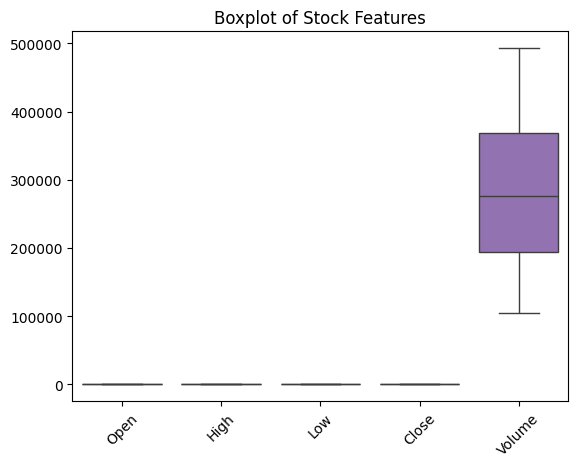

In [6]:
# Boxplot to detect outliers
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Volume']])
ms.title("Boxplot of Stock Features")
ms.xticks(rotation=45)
ms.show()


DISTRIBUTIONS

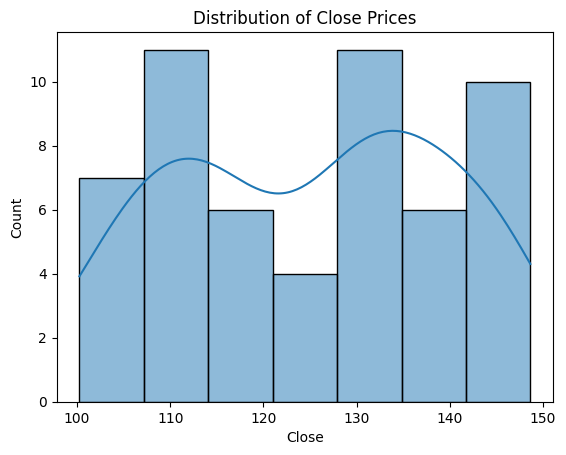

In [9]:
sns.histplot(df['Close'], kde=True)
ms.title("Distribution of Close Prices")
ms.show()